In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing Cleaned data from Phase 1
data = pd.read_csv('Group_14_Clean_Data.csv')

In [3]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [4]:
X

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59440,-0.012,8.484,8.466,-0.014,8.488,58.175,0.0325,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
59441,-0.010,9.180,9.166,-0.018,9.182,63.650,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
59442,7.762,8.610,-0.004,0.578,8.610,77.850,5.5700,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
59443,-0.014,8.770,8.756,-0.016,8.774,55.825,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
y

0        1
1        1
2        1
3        1
4        1
        ..
59440    0
59441    0
59442    0
59443    0
59444    0
Name: status, Length: 59445, dtype: int64

In [6]:
# Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LogisticRegression()
# fit the model to the training data
lr.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Pedicting the Test data using the model trained
y_pred = lr.predict(X_test)

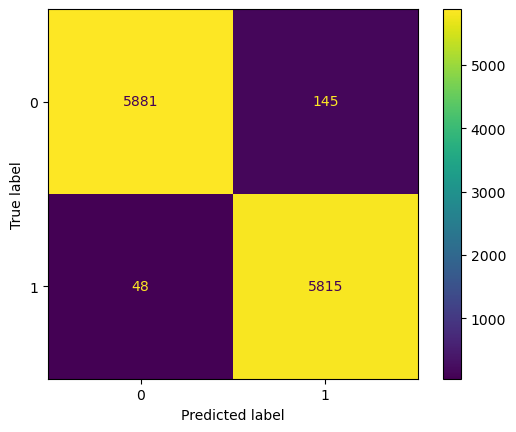

In [9]:
# Displaying the confusion matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [10]:
accuracy_score(y_test, y_pred)

0.9837665068550762

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6026
           1       0.98      0.99      0.98      5863

    accuracy                           0.98     11889
   macro avg       0.98      0.98      0.98     11889
weighted avg       0.98      0.98      0.98     11889



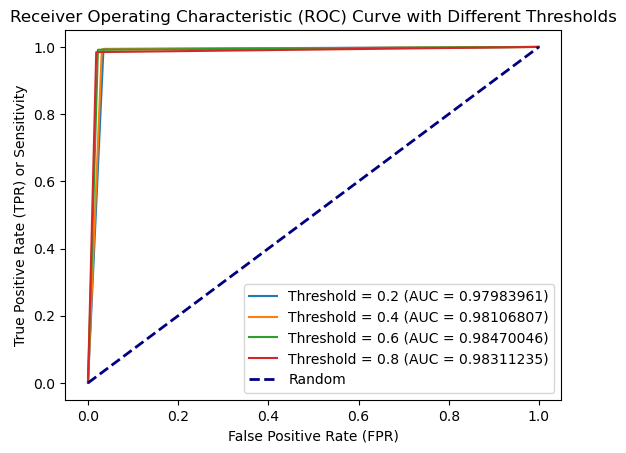

In [13]:
from sklearn.metrics import roc_curve, auc

y_prob = lr.predict_proba(X_test)[:, 1]
for threshold in [0.2, 0.4, 0.6, 0.8]:
    y_pred_threshold = (y_prob > threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_test, y_pred_threshold)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Threshold = {:.1f} (AUC = {:.8f})'.format(threshold, roc_auc))
    #print(threshold, format(roc_auc))
# Plot the "Random" line as a dashed line from (0,0) to (1,1) for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

# Label axes and set the title for the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve with Different Thresholds')
plt.legend(loc='lower right')
plt.show()

As area under curve for threshold = 0.8 is the highest, it yields the maximum accuracy